In [1]:
import matplotlib.pyplot as plt

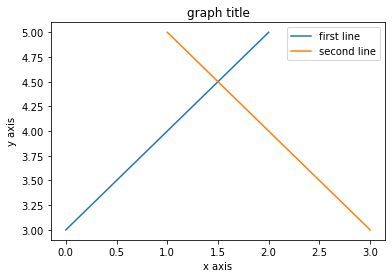

In [14]:
# line graph
x = range(3)
y = [3,4,5]
x2 = range(1,4)
y2 = y[::-1]
plt.plot(x,y, label = 'first line') # this plots the graph
plt.plot(x2,y2, label = 'second line') # label indicates the label of the line as shown in the legend
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title('graph title')
plt.show() # the graph is plotted in the background but we need to bring it to the monitor, so use show(); everytime show() is called, it seems the background graph is destroyed. So if we put the xlabel and title after show(), a new plot will be generated in which the line exist no more.

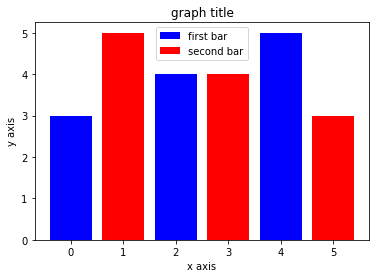

In [19]:
# bar chart
x = range(0,6,2)
y = [3,4,5]
x2 = range(1,7,2)
y2 = y[::-1]
plt.bar(x,y, label = 'first bar', color = 'b') # b stands for blue (so k stands for black)
plt.bar(x2,y2, label = 'second bar', color = 'r') # r stands for red
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title('graph title')
plt.show()

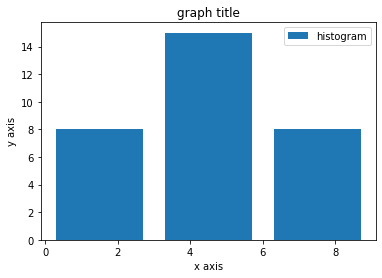

In [32]:
# histogram chart
data_to_be_sorted_into_bins_in_histogram = [2,3,4,2,3,4,5,3,5,5,6,6,4,1,7,5,8,6,9,9,1,9,0,0,3,3,4,2,3,4,2]
bins = [0,3,6,9] # each interval is a bin
plt.hist(x=data_to_be_sorted_into_bins_in_histogram,bins=bins,label='histogram',histtype='bar',rwidth=0.8) # rwidth is the width of each histogram bar, histtype indicates the graph type we need which is bar here.
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title('graph title')
plt.show()

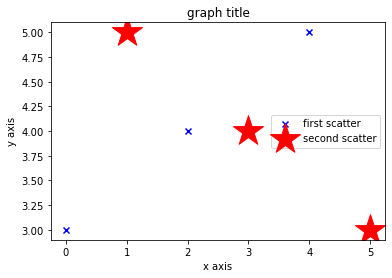

In [30]:
# scatter plot
x = range(0,6,2)
y = [3,4,5]
x2 = range(1,7,2)
y2 = y[::-1]
plt.scatter(x,y, label = 'first scatter', color = 'b', marker='x')
plt.scatter(x2,y2, label = 'second scatter', color = 'r', marker='*',s=1000) # marker is the mark that is the scatter, it can be many character on the keyboard. s is size of hte marker (or dot)
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title('graph title')
plt.show()

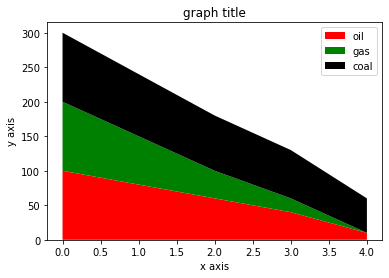

In [38]:
# stack plot: it's the plot which stacks an area on top of another to show the proportion between different areas (variables)
decades_from_now = range(5)
oil = [100,80,60,40,10]
gas = [100,70,40,20,0]
coal = [100,90,80,70,50]
plt.stackplot(decades_from_now, oil, gas, coal, labels=('oil','gas','coal'), colors=('r','g','k'))

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title('graph title')
plt.show()

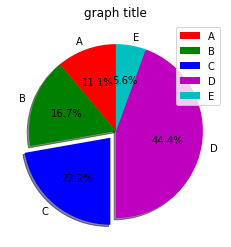

In [55]:
# Piechart
slices = [2,3,4,8,1]
labels_of_slices = ['A','B','C','D','E']
color_of_slices = ['r','g','b','m','c']

plt.pie(slices,
  labels = labels_of_slices,
  colors = color_of_slices,
  startangle=90,
  shadow= True,
  explode=(0,0,0.1,0,0),
  autopct='%0.1f%%')
# startangle is by default 0 deg which means the slicing starts in the positive x direction and goes counterclockwise. shadow gives the pie a shadow effect. explode controls the pieces' displacement from the center. autopct specifies the display format of the percentage: %0.1f means one decimal place precision; %% just means display one % after that since % is a special character.

plt.legend()
plt.title('graph title')
plt.show()

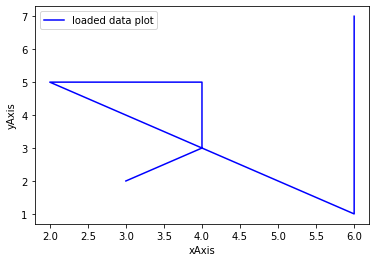

In [61]:
# load data from file
import numpy as np

x,y = np.loadtxt('data.txt',delimiter=',',unpack=True) # default for unpack is False and the matrix will be returned as it is presented in the txt file. When unpack is True, the matrix is transposed so the column element becomes the primary axis, allowing for earsier data unpacking (thus unpack)
plt.plot(x,y, label='loaded data plot', color='b')
plt.xlabel('xAxis')
plt.ylabel('yAxis')
plt.legend()
plt.show()

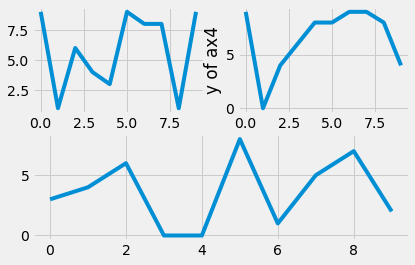

In [102]:
# subplot
import random
from matplotlib import style
# ?plt.rcParams  rcParams are basically params which control the style of the plot (whether there's grid line, what is the tick separation along the x and y axis, etc)
style.use('fivethirtyeight') # a specific style is a predefined set of rcParams which we can use through style.use
fig = plt.figure() # the figure instance (class Figure) is a top level container for all the plot elements. To modify certain elements of this figure, we need to be able to reference it. When we are modifying on plt, we are really doing stuff on the figure.
def create_data():
    x = range(10)
    y = [random.randrange(10) for i in range(10)]
    return x,y

ax1 = fig.add_subplot(2,2,1) # subplots are contained inside the entire figure (plt) 
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,(3,4)) # the first two arguments indicate the type (thus its shape and size) of the subplot, 2,1 means that this is the subplot that is obtained by dividing the entire plot into a grid of 2 rows and 1 column. Each of these grid divisions as each small box indexed from upper left to the lower right. For the third, index argument, what it means is the index of the grid division this subplot will occupy. We could also input a tuple for the index argument. What that means is our subplot spans from the first index of the tuple to the second index of the tuple (inclusive). Of course the grid partition doesn't need to be the same for all subplots we can use whatever partitions and positioning we want. Subplots are all independent. But they may overlap is not implemented correctly.

ax1.plot(*create_data())
ax2.plot(*create_data()) # we are plotting inside the subplots now. plt.show() shows all graphs plotting in the background.
ax2.set_xlabel('x of ax4')
ax2.set_ylabel('y of ax4') # this sets label for the subplot (which is overlapped in this case), while plt.xlabel sets the label for the entire plot
ax3.plot(*create_data())

plt.show()


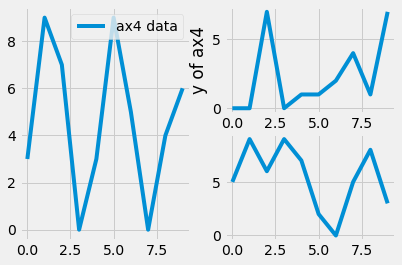

In [129]:
# An equivalence of the above is to use plt.subplot2grid
ax4 = plt.subplot2grid((2,2),(0,0),rowspan=2,colspan=1)
ax5 = plt.subplot2grid((2,2),(0,1),rowspan=1,colspan=1)
ax6 = plt.subplot2grid((2,2),(1,1),rowspan=1,colspan=1)
# the first element is the partition/grid. Second element is the starting position (in terms of (row, col)) of the subplot. rowspan and colspan are intuitive. So, obviously this provides more flexibility since it allows us to control the exact position where it starts. We are using plt here instead of fig (the previous fig.add_subplot() is mostly equivalent to plt.subplot(). the difference being all operations on the plt level will delete any subplot overlapped. This is because in plt we are treating the whole thing as a single plot yet in figure we are viewing it to be consisted of many subplots)

ax4.plot(*create_data(),label='ax4 data')
ax5.set_xlabel('x of ax4')
ax5.set_ylabel('y of ax4')
ax5.plot(*create_data())
ax6.plot(*create_data())
ax4.legend()
plt.show()

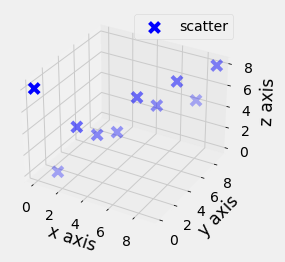

In [131]:
# 3d plots
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()

ax7 = fig.add_subplot(1,1,1,projection = '3d') # for the basics, this projection='3d' is all that is needed to indicate to the system it's a 3d plot.
ax7.set_xlabel('x axis')
ax7.set_ylabel('y axis')
ax7.set_zlabel('z axis')
ax7.scatter(range(10),*create_data(),color='b',marker='x',s=100,label='scatter') 
ax7.legend() # this shows the legend on the subplot. If we use plt.legend(), it shows in the entire plot.
plt.show()

No handles with labels found to put in legend.


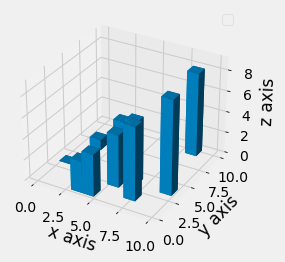

In [133]:
# 3d bar plots: it's really plotting rectangular cubes
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()

ax7 = fig.add_subplot(1,1,1,projection = '3d') # for the basics, this projection='3d' is all that is needed to indicate to the system it's a 3d plot.
ax7.set_xlabel('x axis')
ax7.set_ylabel('y axis')
ax7.set_zlabel('z axis')

x_width = np.ones((10))
y_width = np.ones((10))
z_width = create_data()[0]
x_corr,y_corr = create_data()
z_corr = np.zeros((10))
ax7.bar3d(x_corr,y_corr,z_corr,x_width,y_width,z_width) # the first three elements indicate the starting positions of the bar/rectangular cube and the last 3 indicate the size of the rectangular bar/cube.
ax7.legend() # this shows the legend on the subplot. If we use plt.legend(), it shows in the entire plot.
plt.show()